# LT-DSC-Skript


## required libraries 

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ltdsc_lib import *

Wähle manuell die relevanten Segmentpositionen aus in Form einer Liste. Z.B für Segment 6-8 und 14-16:

`measure_segments = [[6,8],[14,16]]`

In [2]:
measure_segments =  [ [7,9], [16,18]]

thaw_temp_range  =  [ [-47, 10], [-47, 10] ] # in °C

T_range = [[[-48,-46], [8,10]], [[-48,-46], [8,10]]]

## select a single measurement

  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s


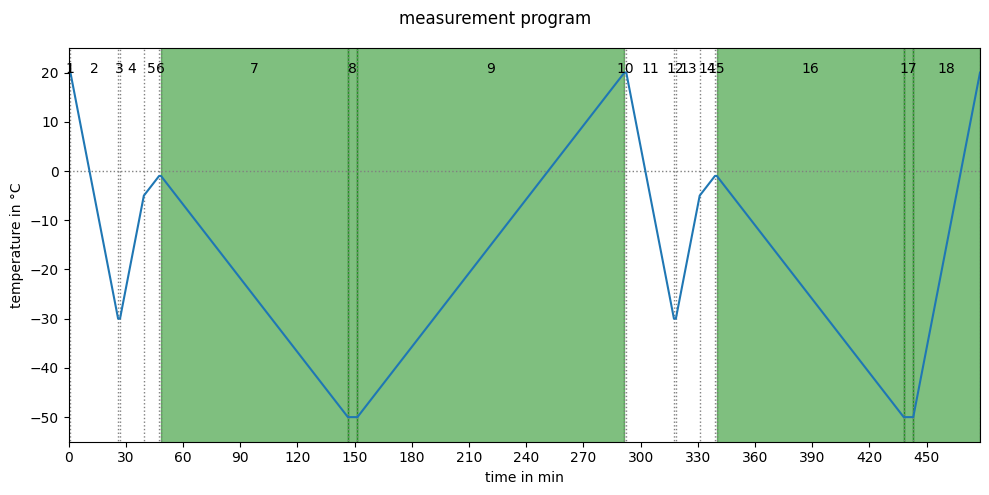

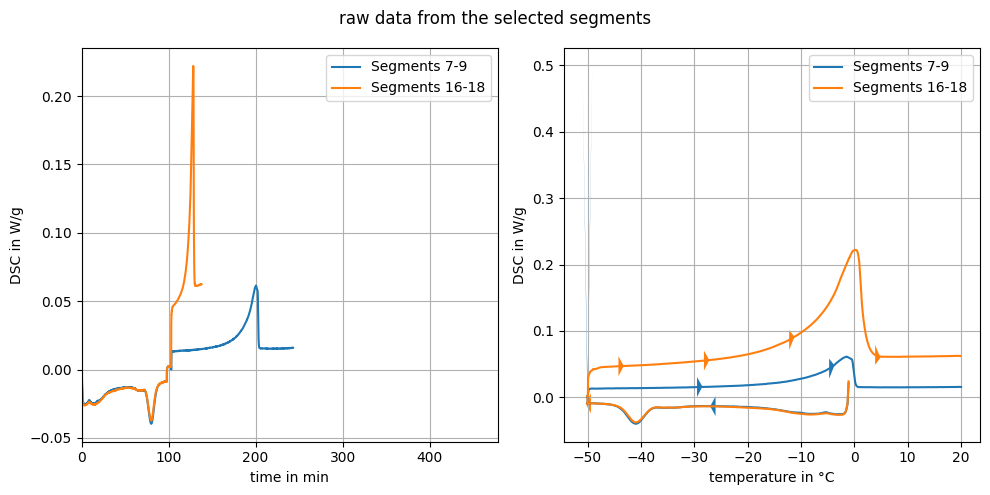

  Segment 9 baseline: y = 0.00001590*x + 0.01335190; R-squared value: 0.99268594
  Segment 18 baseline: y = 0.00054969*x + 0.04497080; R-squared value: 0.99977111


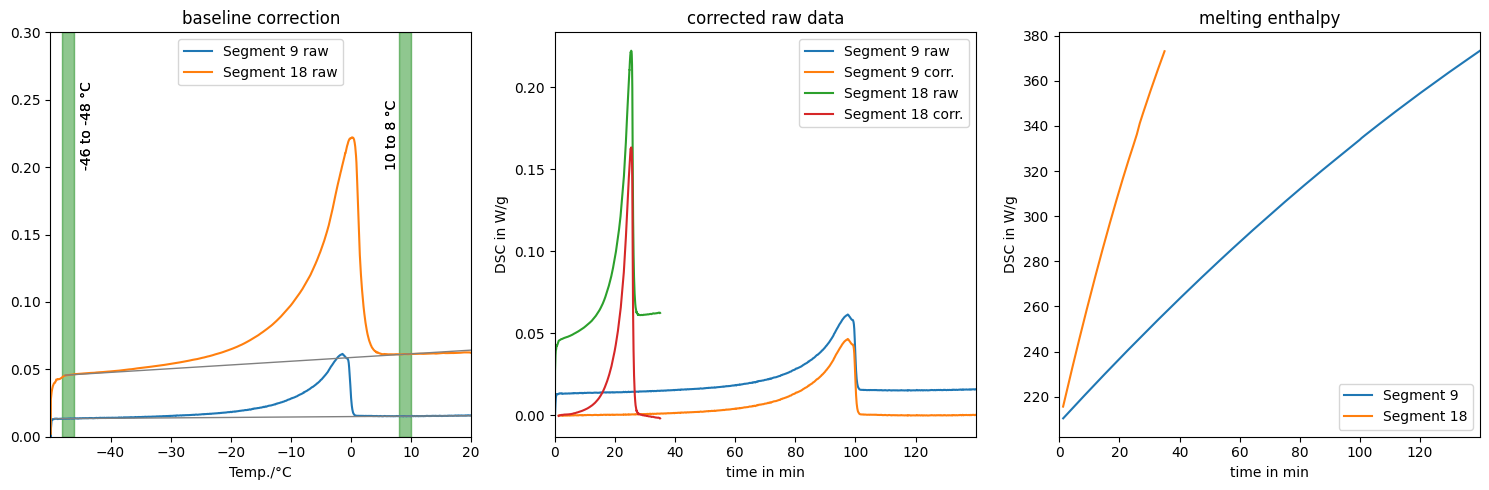

  INFO: measurement frequency changed from 5.00 to 0.42 measurements per second
  (manual) ice mass/volume in segment 09 between [-48, -46] to [8, 10] and [-48, -46] to [8, 10] °C: 154.5 mg/g ; 168.2 µl/g
  (manual) ice mass/volume in segment 18 between [-48, -46] to [8, 10] and [-48, -46] to [8, 10] °C: 142.1 mg/g ; 154.8 µl/g


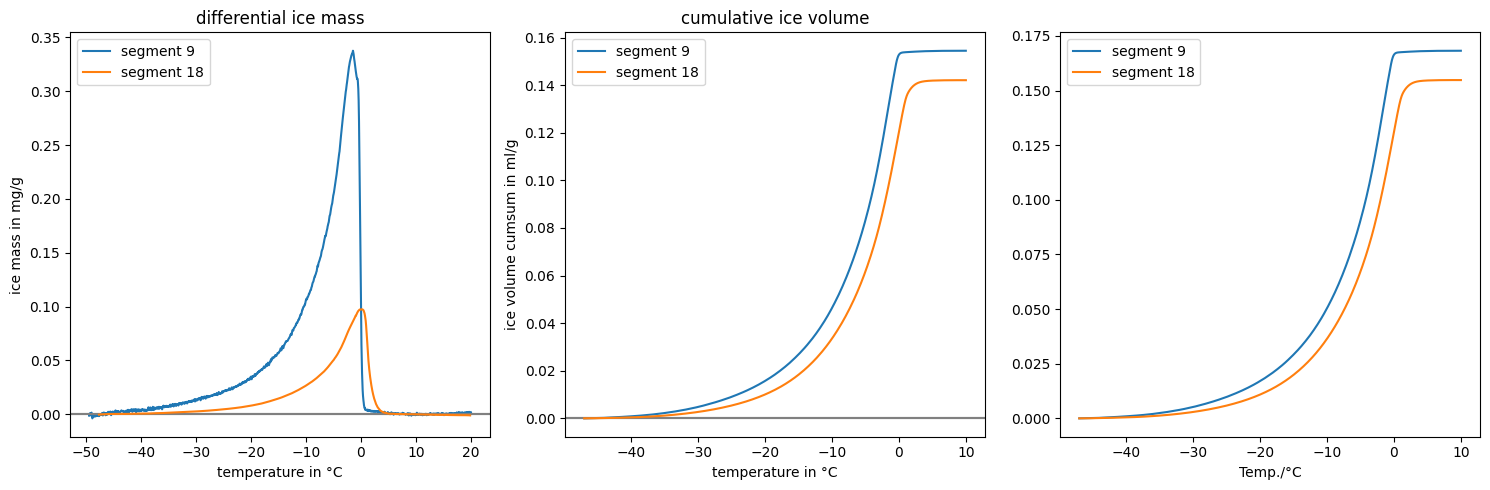

  ice mass difference: -12.38 mg/g


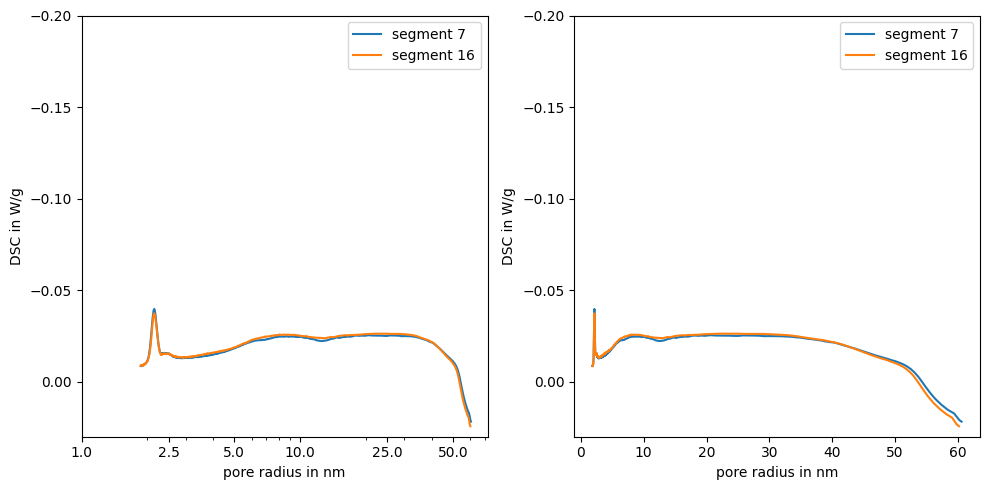

In [3]:
file = select_single_file()
experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25,T_range=T_range, verbose=True)

  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s


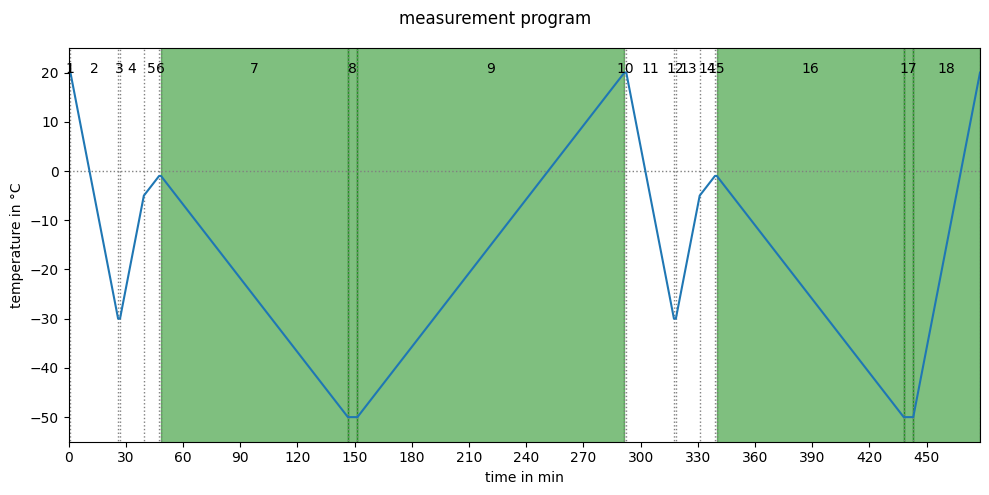

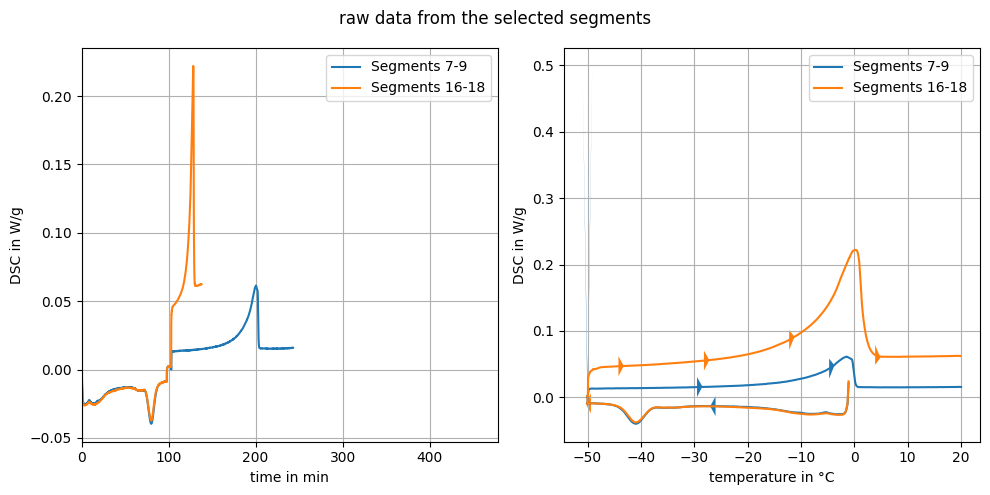

  Segment 9 baseline: y = 0.00001536*x + 0.01340510; R-squared value: 0.99549962
  Segment 18 baseline: y = 0.00053338*x + 0.04507787; R-squared value: 0.99988899


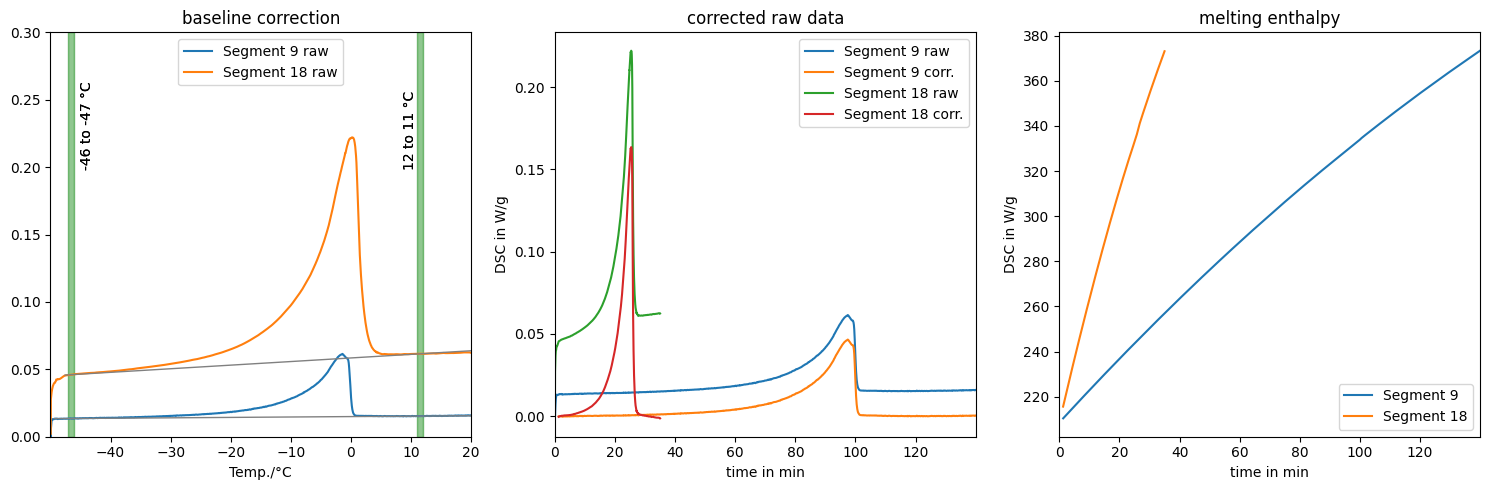

  INFO: measurement frequency changed from 5.00 to 0.42 measurements per second
  (manual) ice mass/volume in segment 09 between [-47, -46] to [11, 12] and [-47, -46] to [11, 12] °C: 153.9 mg/g ; 167.7 µl/g
  (manual) ice mass/volume in segment 18 between [-47, -46] to [11, 12] and [-47, -46] to [11, 12] °C: 142.9 mg/g ; 155.7 µl/g


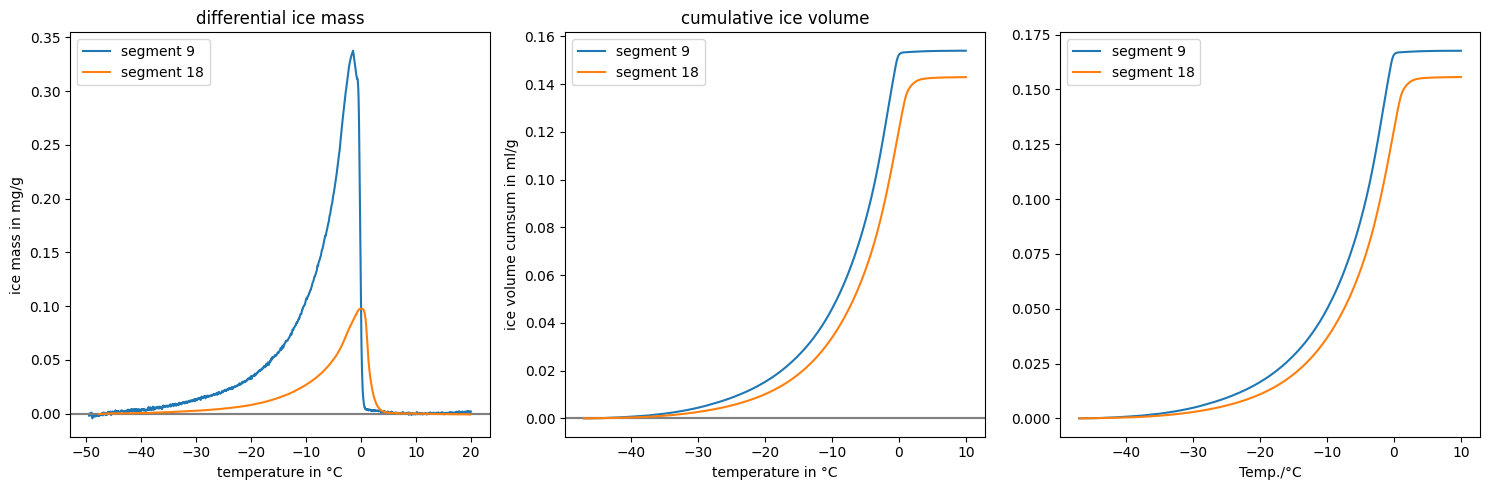

  ice mass difference: -11.07 mg/g


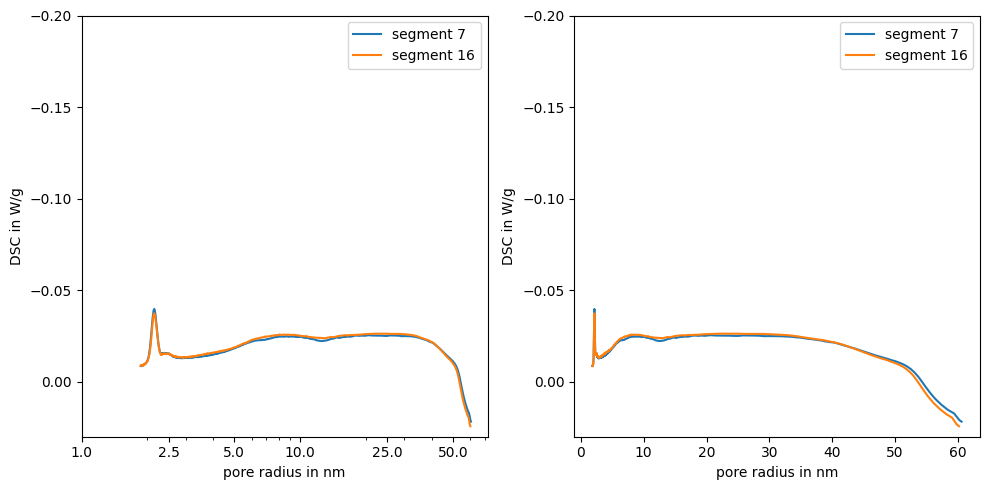

In [8]:
measure_segments =  [ [7,9], [16,18]]

thaw_temp_range  =  [ [-47, 10],[-47, 10] ] # in °C

T_range = [[[-47,-46], [11,12]], [[-47,-46], [11,12]]]

#file = select_single_file()
experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25,T_range=T_range, verbose=True)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
x_step = 22
y_step = 45
Z_0 = np.zeros((x_step, y_step))
Z_1 = np.zeros((x_step, y_step))
x_axis = []
y_axis = []

for j in range(y_step):
    y_axis.append(4+j/4)
for i in range(x_step):
    x_axis.append(-50+i/4)
    for j in range(y_step):
        T_range = [[[x_axis[i], x_axis[i] + 1], [y_axis[j], y_axis[j] + 1]], [[x_axis[i], x_axis[i] + 1], [y_axis[j], y_axis[j] + 1]]]
        experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min=1.25, T_range=T_range, verbose=False)
        Z_0[i, j] = experiment.ice_vol[0]
        Z_1[i, j] = experiment.ice_vol[1]



  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s
  Segment 9 baseline: y = 0.00001821*x + 0.01332103; R-squared value: 0.99491306
  Segment 18 baseline: y = -0.00391899*x + 0.16939594; R-squared value: 0.94312527
  INFO: measurement frequency changed from 5.00 to 0.42 measurements per second
  (manual) ice mass/volume in segment 09 between [-50.0, -49.0] to [4.0, 5.0] and [-50.0, -49.0] to [4.0, 5.0] °C: 152.3 mg/g ; 165.8 µl/g
  (manual) ice mass/volume in segment 18 between [-50.0, -49.0] to [4.0, 5.0] and [-50.0, -49.0] to [4.0, 5.0] °C: 299.0 mg/g ; 324.2 µl/g
  ice mass difference: 146.72 mg/g
  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s
  Segment 9 baseline: y = 0.00001790*x + 0.01332157; R-squared value: 0.99446020
  Segmen

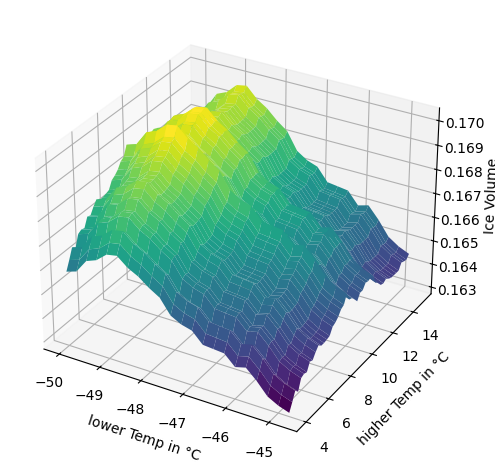

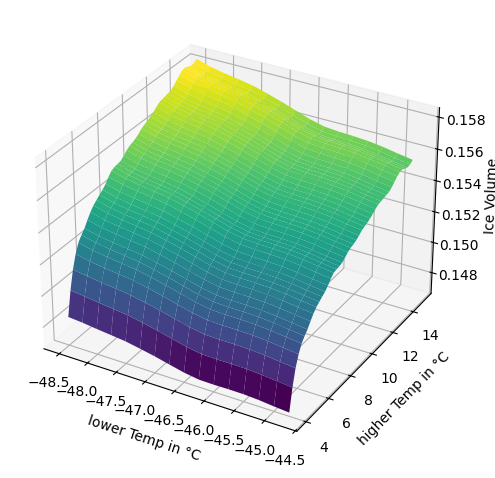

In [6]:
fig = plt.figure()
#plt.title('0.5K/min')   
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x_axis, y_axis)
ax.plot_surface(X, Y, Z_0.T, cmap='viridis')

ax.set_xlabel('lower Temp in °C')
ax.set_ylabel('higher Temp in °C')
ax.set_zlabel('Ice Volume')

plt.tight_layout()
plt.show()

fig = plt.figure()
#plt.title('2K/min')
ax = fig.add_subplot(111, projection='3d')
# Filter the x_axis and Z_1 values
x_axis_filtered = [x for x in x_axis if -48.5 <= x <= -44]
Z_1_filtered = Z_1[[i for i, x in enumerate(x_axis) if -48.5 <= x <= -44], :]

# Create the meshgrid with the filtered x_axis
X, Y = np.meshgrid(x_axis_filtered, y_axis)
ax.plot_surface(X, Y, Z_1_filtered.T, cmap='viridis')

ax.set_xlabel('lower Temp in °C')
ax.set_ylabel('higher Temp in °C')
ax.set_zlabel('Ice Volume')

plt.tight_layout()
plt.show()

In [7]:
print(x_axis)
plt.plot(x_axis, result_vol[0], label='section 1')
plt.plot(x_axis, result_vol[1], label='section 2')
plt.xlabel('Temperature [°C]')
plt.ylabel('Volume [mL]')
plt.legend()
plt.show()


[-50.0, -49.75, -49.5, -49.25, -49.0, -48.75, -48.5, -48.25, -48.0, -47.75, -47.5, -47.25, -47.0, -46.75, -46.5, -46.25, -46.0, -45.75, -45.5, -45.25, -45.0, -44.75]


NameError: name 'result_vol' is not defined

In [ ]:
result_vol = [[],[]]
result_mass = [[],[]]
x_axis = []
for i in range(140):
    x_axis.append(5+i/10)
    
    T_range = [[-48,-47], [x_axis[i],x_axis[i]+1]]
    experiment = ltdsc_measurement(file, measure_segments, thaw_temp_range, ignore_first_n_min = 1.25,T_range=T_range, verbose=False)
    result_vol[0].append(experiment.ice_vol[0])
    result_vol[1].append(experiment.ice_vol[1])
    result_mass[0].append(experiment.ice_mass[0])
    result_mass[1].append(experiment.ice_mass[1])

  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s
  Segment 9 baseline: y = 0.00001758*x + 0.01329440; R-squared value: 0.99554379
  Segment 18 baseline: y = 0.00059374*x + 0.04477078; R-squared value: 0.99980859
  INFO: measurement frequency changed from 5.00 to 0.42 measurements per second
  (manual) ice mass/volume in segment 09 between -48 to -47 and 5.0 to 6.0 °C: 153.6 mg/g ; 167.3 µl/g
  (manual) ice mass/volume in segment 18 between -48 to -47 and 5.0 to 6.0 °C: 139.7 mg/g ; 152.2 µl/g
  ice mass difference: -13.93 mg/g
  Found a valid experiment file. Encoding: UTF-16
  Loading M28n2-28d
    - loaded measurement M28n2-28d from 2025-02-06 12:50:00
    - The data contains 5.0 measurements per s
  Segment 9 baseline: y = 0.00001751*x + 0.01329467; R-squared value: 0.99560355
  Segment 18 baseline: y = 0.00059212*x + 0.04477305; R-squared value: 0.99980660

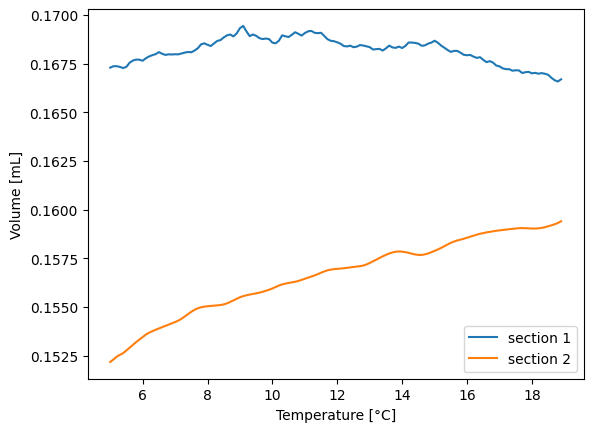

In [ ]:
plt.plot(x_axis, result_vol[0], label='section 1')
plt.plot(x_axis, result_vol[1], label='section 2')
plt.xlabel('Temperature [°C]')
plt.ylabel('Volume [mL]')
plt.legend()
plt.show()


## The following code is individual for the selected dataset

In [ ]:
directory, materials = load_multiple_experiments( measure_segments, thaw_temp_range, True )
specimen_ages = ['1d','7d','14d','21d','28d']
ice_dataframe, ice_stat_dataframe = process_ice_mass_dev( materials, specimen_ages )
    

0 TXT Dokumente gefunden.


In [ ]:

for experiment in materials.keys():
    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
    fig.suptitle(experiment, fontsize=16)
    for key, data in materials[experiment].items():
        for k, measure_segment in enumerate(measure_segments):
            for i in [0,1]:
                df_s = data.raw_data[(data.raw_data['Segment'] == measure_segment[0])]
                
                df_s.plot(             y='DSC/(mW/mg)', x ='pore radius in nm', ax=ax[i], label=key.format( measure_segment[0] ))
                ax[i].set_ylim(0,-.2)
                ax[i].set_xlim([1,200])
                ax[i].set_xlabel('pore radius in nm')
                ax[i].set_ylabel('DSC in W/g')
    ax[0].set_xscale('log')
    ax[0].set_xticks([1,2.5,5,10,25,50])
    ax[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    plt.tight_layout()
    plt.show()